<h1 align="center">Scientific Programming in Python</h1>
<h2 align="center">Topic 7: Basics of Data Visualization  </h2> 


_Notebook created by Felipe Mancilla S - `felipe.mancilla@alumnos.usm.cl` - DI UTFSM - May 2017._

In [3]:
import numba
import numexpr as ne
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

En la presente actividad simularemos y visualizaremos un sistema dinámico 2-dimensional simple. Para ello resolveromos una EDO numéricamente, utilizando el _método de Euler_. 

Consideremos un sistema de $N$ partículas $(x_i(t), y_i(t))$ en el dominio $[0,1]\times[0,1]$, cuyo movimiento se rige por las siguientes ecuaciones (EDOs autónomas):

\begin{align}
\frac{dx}{dt} &= \text{tanh}(x^2+y^2), \text{ con } x(0)=x_0, \\
\frac{dy}{dt} &= \text{tanh}(x^2+y^2), \text{ con } y(0)=y_0 \\
\end{align}

El _método de Euler_ para resolver este problema numéricamente, consiste en realizar la siguiente aproximación para la derivada:

\begin{align}
\frac{x_{i+1}-x_i}{\Delta t} =  \text{tanh}(x_i^2+y_i^2) \rightarrow x_{i+1} = x_i + \Delta t \cdot \text{tanh}(x_i^2+y_i^2) \\
\frac{y_{i+1}-y_i}{\Delta t} =  \text{tanh}(x_i^2+y_i^2) \rightarrow y_{i+1} = y_i + \Delta t \cdot \text{tanh}(x_i^2+y_i^2)
\end{align}

ocupando las condiciones iniciales $x_0$ e $y_0$ como puntos de partida. Aquí $\Delta t$ (_time step_) es un parámetro definido por usted, y usualmente toma valores pequeños.

__Notar__ que esta ecuación es válida para una partícula, y por tanto para simular un sistema de $N$ de estas, es necesario realizar esta actualización para cada partícula $(x_i,y_i)$ con $i \in [1,N]$.

__Se solicita que realice lo siguiente__:
1. Genere un conjunto de `100` puntos aleatoriamente distribuidos en el espacio $[0,1]\times[0,1]$ (Seran usados como posiciones iniciales del sistema). Grafíque el conjunto de puntos obtenidos.
2. Realizar un gráfico de la función que define el comportamiento del sistema: $f(z) = \text{tanh}(z^2)$ (gráfico unidimensional).
3. Desarrollar la función `simular(x0, y0, dt, tf)` que reciba los `np.ndarray` con las coordenadas iniciales `x0` e `y0` del sistema, el _time step_ `dt` (seleccione un valor pequeño $\sim 0.01$) y el tiempo final de simulación. Esta función debe graficar el conjunto de puntos del sistema, en su tiempo final.
4. Usando `interact` desarrolle un _widget_ para visualizar interactivamente distintos estados finales del sistema (distintos `tf`).

In [4]:
def f(x,y):
    z=x**2+y**2
    return np.tanh(z)
def f1(z):
    return np.tanh(z**2)

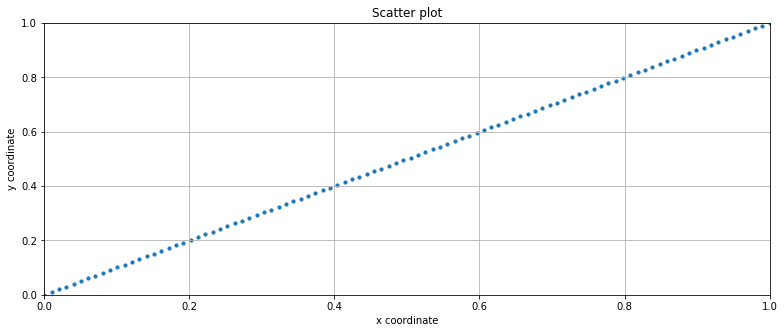

In [5]:
plt.figure(figsize=(13, 5))

x = np.linspace(0,1,100)
y = np.linspace(0,1,100)

plt.scatter(x, y, marker='o',s=10)
plt.grid()
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title('Scatter plot')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

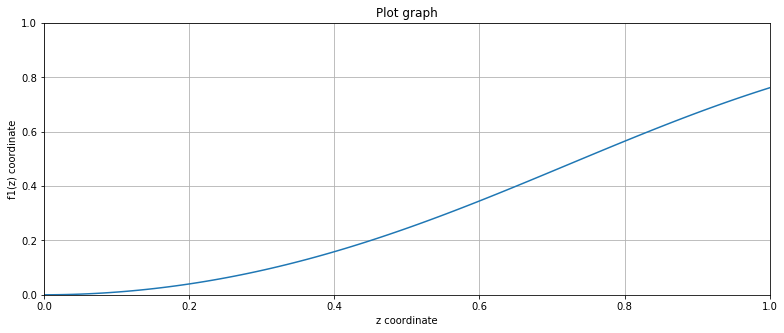

In [14]:
plt.figure(figsize=(13, 5))

z = np.linspace(0,1,100)

plt.plot(z, f1(z))
plt.grid()
plt.xlabel('z coordinate')
plt.ylabel('f1(z) coordinate')
plt.title('Plot graph')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
def simular(x0, y0, dt, tf):
    x = np.zeros([tf])
    y = np.zeros([tf])
    x[0]=x0
    y[0]=y0
    for i in range(1,tf):
        x[i]= x[i-1] + dt * f(x[i-1],y[i-1])
        y[i]= y[i-1] + dt * f(x[i-1],y[i-1])

    fig = plt.figure(figsize=(9,9))
    ax = fig.gca(projection='3d')

    X, Y = np.meshgrid(x, y)
    Z = f(X,Y)

    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

    ax.set_zlim(-0.1, 1.1)

    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show();

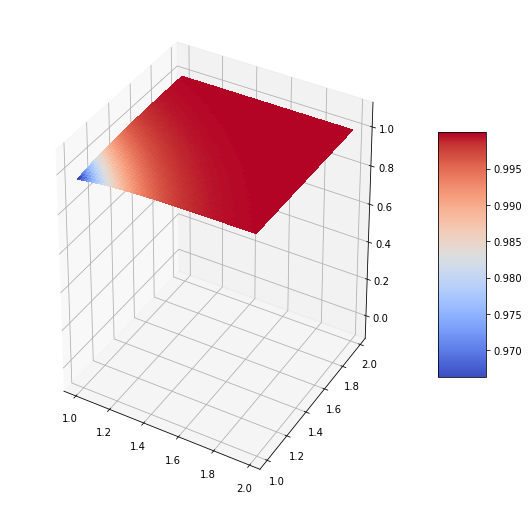

In [16]:
simular(1,1,0.01,100)

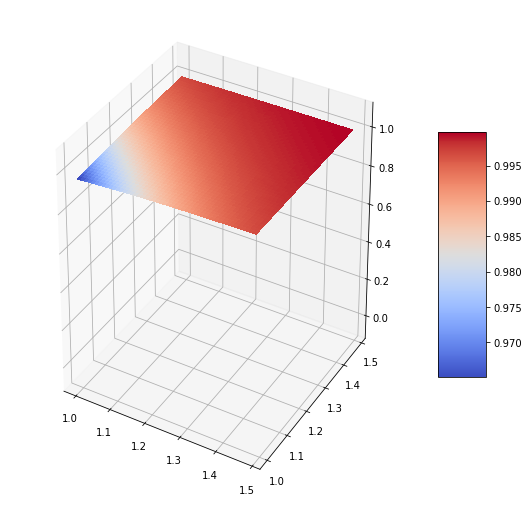

<function __main__.simular>

In [17]:
from ipywidgets import interact
from ipywidgets import fixed
interact(simular,x0=(0,2),y0=(0,2),dt=fixed(0.01),tf=(1,100))